### Importación de datos



In [1]:
import pandas as pd

!pip install matplotlib==3.8.1
import matplotlib.pyplot as plt

paleta_de_colores = ["#fbf8cc","#fde4cf","#ffcfd2","#f1c0e8","#cfbaf0","#a3c4f3","#90dbf4","#8eecf5","#98f5e1","#b9fbc0"]

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



In [2]:
# creamos una lista que almacene todas las tiendas
tiendas = [tienda1, tienda2, tienda3, tienda4]

In [3]:
# Creamos una lista de diccionarios donde almacenaremos los datos que vamos estudiando de las tiendas.
datos = []

In [4]:
# Agregamos cada diccionario por tienda a datos, así cada elemento de la lista, será un diccionario correspondiente a una tienda, el cual será iniciado con la llave 'nombre' con el valor 'Tienda'+número de tienda
for i in range(len(tiendas)):
  datos.append({'nombre':'tienda'+str(i+1)})

In [5]:
# visualizamos cómo queda
datos

[{'nombre': 'tienda1'},
 {'nombre': 'tienda2'},
 {'nombre': 'tienda3'},
 {'nombre': 'tienda4'}]

En este primer análisis, calculamos el ingreso total de cada tienda. Sumando los valores de la columna 'Precio' de cada conjunto de datos de la tienda para estimar los ingresos, almacenandolos en una lista aparte para luego poder mostrar los datos con un gráfico de barras y añadiendo el dato obtenido a la tienda correspondiente en nuestra lista 'datos'

In [6]:
# definimos una función para calcular los ingresos totales por tienda. La función recibirá la lista de tiendas. Añadirá ese valor a nuestra lista 'datos' en la tienda correspondiente bajo la llave 'ingresosTotales', que a su vez devuelva una lista de tuplas con formato (tiendaN, ingresoTotal) con la cual creará un gráfico de barras, pero que sirve de base para graficar en cualquier formato; y un string informando cuál fue la tienda que más vendió, junto a una pequeña tabla que resuma la información

def ingresosTotalesPorTienda(listaTiendas):
    '''Función para calcular los ingresos totales por tienda y agregarlo a la lista "datos" modificandola con la llave "ingresosTotales" y su valor correspondiente. 
    
    Args:
        La función recibirá una lista de tiendas. 
        
    Outputs:
        Muestra un gráfico de barras y una tabla comparativa con los ingresos totales por tienda.

    Returns:
        Lista de tuplas con formato (tiendaN, ingresoTotal)
        
    
    '''


    # iteraremos sobre cada una de las tiendas
    # lo haremos en base a su índice 
    listaTuplasSalida = []
    
    for i in range(len(listaTiendas)):
        # dentro de la tienda actual estamos recorriendo por índice, creamos una nueva llave 'ingresosTotales' y asignamos el valor de la suma de la lista precio correspondiente a dicha precio usando la función sum()
        datos[i]['ingresosTotales']=sum(listaTiendas[i]['Precio'])
        listaTuplasSalida.append((datos[i]['nombre'], datos[i]['ingresosTotales']))


    # para mostrar un gráfico de barra con ingresos totales por tienda
    plt.title("Ventas por tienda")

    # ya que en nuestra listaTuplaSalida las tuplas estan ordenadas como (nombre, valor) 
    # podemos armar una lista de los nombres
    # [tienda[0] for tienda in listaTuplasSalida] para el eje x
    # y otra de los valores facilmente, 
    # [tienda[1] for tienda in listaTuplasSalida] para el eje y.
    plt.bar(x = [tienda[0] for tienda in listaTuplasSalida], height = [tienda[1] for tienda in listaTuplasSalida], width=0.5, color = paleta_de_colores)
    plt.show()
    

    # para redactar cuál fue la tienda que más vendió
    
    # usamos nuevamente nuestra tupla accediendo a los elementos de index 1
    # y con max() buscamos el valor máximo de todos los ingresos totales
    mayorIngresoTotal = max([tienda[1] for tienda in listaTuplasSalida])

    # y con el valor del máximo, buscamos por indexación el nombre de la tienda dentro de las tuplas con index 0
    # a esa lista agregamos .index(valor a buscar), que en nuestro caso el valor a buscar es el de mayor ingreso, obtenemos su índice, al cuál debemos sumar 1, ya que los nombres de nuestras tiendas parten de 1, mientras que la indexación lo hace desde 0.
    tiendaMayorVenta = 'tienda'+str([tienda[1] for tienda in listaTuplasSalida].index(mayorIngresoTotal)+1)

    # imprimimos el mensaje de la tienda con más ventas
    print(f'La tienda qué más vendió fue la {tiendaMayorVenta} con {mayorIngresoTotal} ingresos totales')

    # agregamos una pequeña tabla para visualizar los ingresos totales por tienda

    # iteraremos sobre nuestra listaTuplasSalida para ir mostrando los resultados, partiendo desde -1 para tener la sección de columna y fila

    for fila in range(2):
        for columna in range(-1,len(listaTuplasSalida)):
            # para la primera columna
            if columna == -1:
                if fila == 0:
                    print(f"{'Tienda'.center(20)} | ", end="")
                elif fila == 1:
                    print(f"{'Ingresos Totales'.center(20)} | ", end="")
            # para el resto de las columnas
            elif columna<len(listaTuplasSalida)-1:
                print(f'{str(listaTuplasSalida[columna][fila]).center(15)} | ', end="")
            elif columna==len(listaTuplasSalida)-1:
                print(f'{str(listaTuplasSalida[columna][fila]).center(15)}')
                


    # devolvemos la tupla obtenida para poder usarla en gráfico
    return listaTuplasSalida

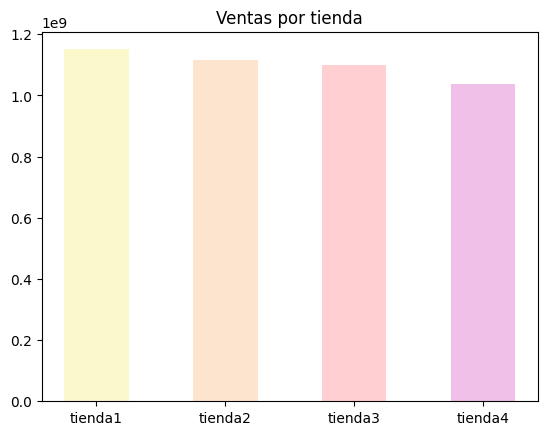

La tienda qué más vendió fue la tienda1 con 1150880400.0 ingresos totales
       Tienda        |     tienda1     |     tienda2     |     tienda3     |     tienda4    
  Ingresos Totales   |   1150880400.0  |   1116343500.0  |   1098019600.0  |   1038375700.0 


[('tienda1', 1150880400.0),
 ('tienda2', 1116343500.0),
 ('tienda3', 1098019600.0),
 ('tienda4', 1038375700.0)]

In [7]:
# aplicamos la función y verificamos la salida
ingresosTotalesPorTienda(tiendas)

In [8]:
# verificamos como quedó nuestra lista 'datos'
datos

[{'nombre': 'tienda1', 'ingresosTotales': 1150880400.0},
 {'nombre': 'tienda2', 'ingresosTotales': 1116343500.0},
 {'nombre': 'tienda3', 'ingresosTotales': 1098019600.0},
 {'nombre': 'tienda4', 'ingresosTotales': 1038375700.0}]

In [9]:
help(ingresosTotalesPorTienda)

Help on function ingresosTotalesPorTienda in module __main__:

ingresosTotalesPorTienda(listaTiendas)
    Función para calcular los ingresos totales por tienda y agregarlo a la lista "datos" modificandola con la llave "ingresosTotales" y su valor correspondiente.

    Args:
        La función recibirá una lista de tiendas.

    Outputs:
        Muestra un gráfico de barras y una tabla comparativa con los ingresos totales por tienda.

    Returns:
        Lista de tuplas con formato (tiendaN, ingresoTotal)



# 2. Ventas por categoría

En este paso calcularemos la cantidad de productos vendidos por categoría en cada tienda. 
La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [10]:
def ventasPorCategoria (listaTiendas):
    '''Función que lee una lista de las tiendas, agrega a la lista "datos" un diccionario a cada tienda con llave el nombre de la categoría y valor igual a la cantidad de productos vendidos de esa categoría.

    args:
        lista de tiendas

    return:
        lista de tuplas, cada elemento de la lista contiene tuplas con los datos de cada tienda según el formato (categoria, cantidad)

    '''
    
    # iniciaremos una lista llamada "categorias" para ir anexando dentro todas las categorías en caso de que esté presente en una tienda, y en otra no.

    categorias = []
    
    # accedemos a una lista de tuplas con el formato (número de venta, categoría del producto vendido)  con 
    # list(tiendas[i]["Categoría del Producto"].items())
    
    # iremos iterando sobre cada tienda de la lista

    # aplicamos sobre el objeto, map con una función lambda, que nos devuelva únicamente el segundo valor de la tupla que corresponde a la categoría del producto en dicha tienda

    for i in range(len(tiendas)):
        list(map(lambda x: categorias.append(x[1]) if x[1] not in categorias else None,list(tiendas[i]["Categoría del Producto"].items())))

    # ordenamos la lista de categorías alfabéticamente

    categorias.sort()

    # crearemos una lista de listas, con tuplas, donde cada lista de la lista, corresponde a una tienda, y dentro incluye tuplas con el formato (categoria, cantidad de elementos vendidos de la categoría).

    productosPorCategoriaPorTienda = []

    # iteramos sobre la lista de tiendas
    for i in range(len(tiendas)):

        # dentro de una tienda, obtendremos una lista con la categoría de cada producto vendido

        tienda = list(map(lambda x: x[1],list(tiendas[i]["Categoría del Producto"].items())))

        # creamos una nueva lista para almacenar las tuplas (categoria, cantProductos) dentro de nuestra lista productosPorCategoriaPorTienda al finalizar el conteo
        
        listaProvisoria = []

        # iteraremos sobre cada categoría obtenida previamente para contar la cantidad de veces que se repite con .count y agregarlo a nuestra listaProvisoria

        [listaProvisoria.append((categoria,tienda.count(categoria))) for categoria in categorias]

        # agregamos los datos de cantidad de productos vendidos por categoría dentro de nuestra lista datos, en un nuevo diccionario con compresión
        
        datos[i]['categorias'] = {categoria: tienda.count(categoria) for categoria in categorias}

        # finalmente agregamos nuestra listaProvisoria a nuestra lista de productosPorCategoriaPorTienda

        productosPorCategoriaPorTienda.append(listaProvisoria)
    
    # finalmente devolvemos la lista de tuplas obtenida
    return productosPorCategoriaPorTienda

    

In [11]:
# creamos una función que reciba como argumento la lista de tuplas obtenidas, para que nos muestre un gráfico y una salida de texto con las categorías más vendidas por tienda

def ventasPorCategoriaBarras(listaDeTiendas):
    '''
    
    '''

    # iteramos sobre cada lista de la lista, que corresponde a una tienda

    for i in range(len(listaDeTiendas)):

        # definiremos la paleta de colores en base a la cantidad de categorías dentro de las tiendas, reiniciandola para cada tienda

        colores = paleta_de_colores[:len(listaDeTiendas[0])]
        
        # de la tupla obtenemos únicamente las cantidades de productos vendidos por categoría y los asignamos a una lista

        valores = [categoria[1] for categoria in listaDeTiendas[i]]

        # luego creamos una nueva lista con los valores ordenados de mayor a menor dentro de una lista

        valoresOrdenados = sorted([categoria[1] for categoria in listaDeTiendas[i]], reverse=True)
        

        # para saber la categoría más vendida

        # creamos una variable para el más vendido, asignandole el valor del primer elemento de nuestra lista de valores ordenados que será el mayor

        cantCategoriaMasVendida1 = valoresOrdenados[0]

        # averiguamos el index del mayor elemento dentro de nuestra lista valores y lo almacenamos

        indexMasVendida1 = valores.index(cantCategoriaMasVendida1)

        # almacenamos el nombre de nuestra categoría más vendida en base al index obtenido previamente

        categoriaMasVendida1 = listaDeTiendas[i][indexMasVendida1][0]

        # cambiamos el color de su barra

        colores[indexMasVendida1] = '#2b9348'
        
        # para saber la segunda categoría más vendida, repetimos lo previo
        
        cantCategoriaMasVendida2 = valoresOrdenados[1]
        indexMasVendida2 = valores.index(cantCategoriaMasVendida2)
        categoriaMasVendida2 = listaDeTiendas[i][indexMasVendida2][0]

        # para cambiar su color de barra
        
        colores[indexMasVendida2] = '#55a630'

        # para saber la tercera categoría más vendida
        
        cantCategoriaMasVendida3 = valoresOrdenados[2]
        indexMasVendida3 = valores.index(cantCategoriaMasVendida3)
        categoriaMasVendida3 = listaDeTiendas[i][indexMasVendida3][0]

        # para cambiar su color de barra
        
        colores[indexMasVendida3] = '#80b918'

        # para saber la categoría menos vendida
        
        cantCategoriaMenosVendida = valoresOrdenados[-1]
        indexMenosVendida = valores.index(cantCategoriaMenosVendida)
        categoriaMenosVendida = listaDeTiendas[i][indexMenosVendida][0]

        # para cambiar su color de barra
        
        colores[indexMenosVendida] = '#f94144'
        
        # iniciamos el gráfico con su título, tamaño de fuente, espesor de la misma y color

        plt.title(f"Ventas por categoría en Tienda{i+1}", fontsize=16, fontweight="bold", color='black')

        # asignamos argumentos al eje x e y, como también el color de las barras
        plt.bar(x = [categoria[0] for categoria in listaDeTiendas[i]], height = valores, color = colores)

        # damos inclinación a las etiquetas del eje x debido a que son muchas y se superponen
        plt.xticks(rotation=90)

        # mostramos el gráfico
        plt.show()

        # mostramos conclusión
        print(f'La categoría más vendida de la tienda{i+1} es {categoriaMasVendida1} con {cantCategoriaMasVendida1} ventas')
        print(f'La segunda categoría más vendida de la tienda{i+1} es {categoriaMasVendida2} con {cantCategoriaMasVendida2} ventas')
        print(f'La tercera categoría más vendida de la tienda{i+1} es {categoriaMasVendida3} con {cantCategoriaMasVendida3} ventas')
        print(f'La categoría menos vendida de la tienda{i+1} es {categoriaMenosVendida} con {cantCategoriaMenosVendida} ventas')

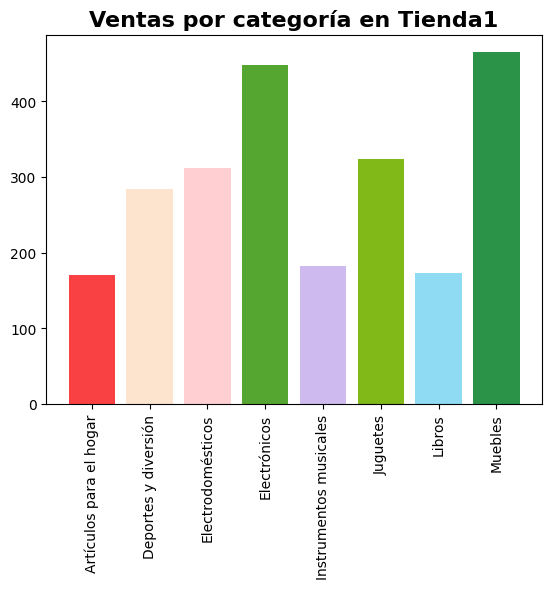

La categoría más vendida de la tienda1 es Muebles con 465 ventas
La segunda categoría más vendida de la tienda1 es Electrónicos con 448 ventas
La tercera categoría más vendida de la tienda1 es Juguetes con 324 ventas
La categoría menos vendida de la tienda1 es Artículos para el hogar con 171 ventas


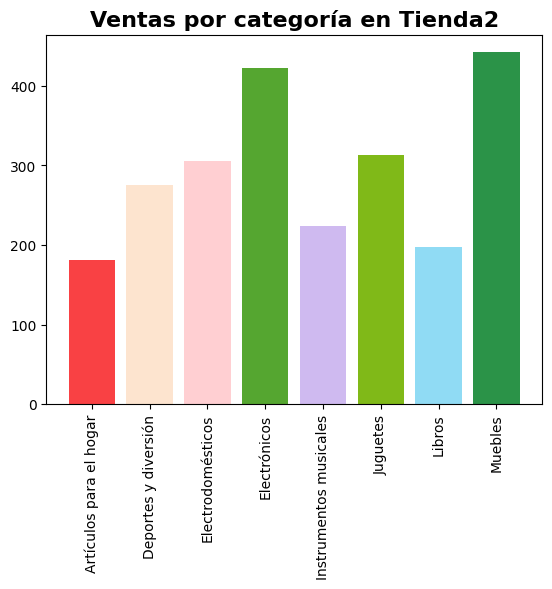

La categoría más vendida de la tienda2 es Muebles con 442 ventas
La segunda categoría más vendida de la tienda2 es Electrónicos con 422 ventas
La tercera categoría más vendida de la tienda2 es Juguetes con 313 ventas
La categoría menos vendida de la tienda2 es Artículos para el hogar con 181 ventas


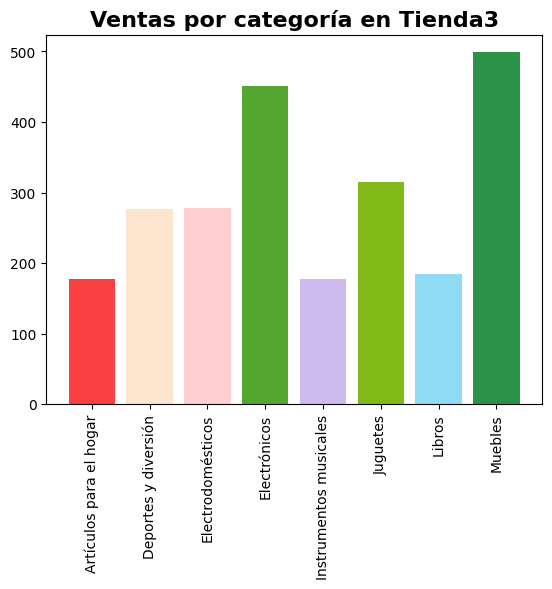

La categoría más vendida de la tienda3 es Muebles con 499 ventas
La segunda categoría más vendida de la tienda3 es Electrónicos con 451 ventas
La tercera categoría más vendida de la tienda3 es Juguetes con 315 ventas
La categoría menos vendida de la tienda3 es Artículos para el hogar con 177 ventas


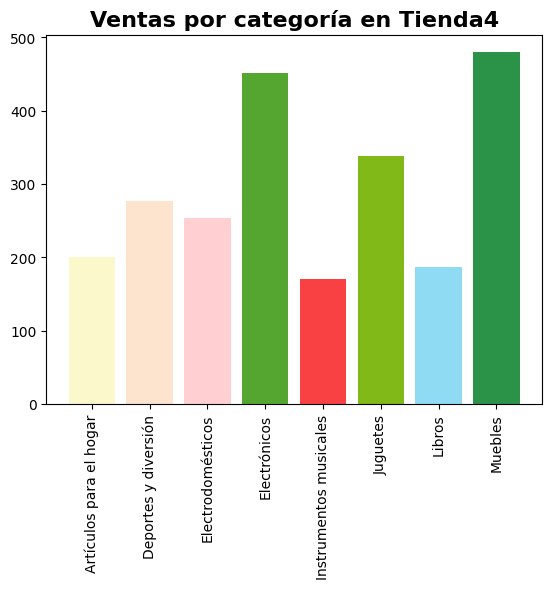

La categoría más vendida de la tienda4 es Muebles con 480 ventas
La segunda categoría más vendida de la tienda4 es Electrónicos con 451 ventas
La tercera categoría más vendida de la tienda4 es Juguetes con 338 ventas
La categoría menos vendida de la tienda4 es Instrumentos musicales con 170 ventas


In [12]:
# aplicamos la función para graficar, sobre la función ventasPorCategoria, entonces, agregamos la información a la lista datos, a la vez que obtenemos la tupla que retorna, como argumento de la función ventasPorCategoriaBarras

ventasPorCategoriaBarras(ventasPorCategoria(tiendas))

Creando una salida por tabla para ver mejor la cantidad de productos vendidos por categoría por tienda

In [32]:
# definimos una función para visualizar una tabla comparativa de la cantidad de productos vendidos por categoría en cada tienda
def ventasPorCategoriaPorTiendaComparativa (listaTiendas):
    
    # debemos recorrer desde -1 por el encabezado, hasta la cantidad de categorías
    
    for fila in range(-1,len(listaTiendas[0])):
        
        # debemos recorrer desde -1, ya que a partir de 0 iteraremos en la lista de tiendas
        for tienda in range(-1,len(listaTiendas)):
            if fila == -1:
                if tienda == -1:
                    print(f"{'Categoría':<30} | ", end="")
                elif tienda == len(listaTiendas)-1:
                    print(f"{('Tienda'+str(tienda+1)).center(10)} | ")
                else:
                    print(f"{('Tienda'+str(tienda+1)).center(10)} |", end="")
            else:
                if tienda == -1:
                    print(f"{(listaTiendas[0][fila][0]):<30} | ", end="")
                elif tienda == len(listaTiendas)-1:
                    print(f"{str(listaTiendas[tienda][fila][1]).center(10)}")           
                else:
                    print(f"{str(listaTiendas[tienda][fila][1]).center(10)} |", end="")  

In [33]:
ventasPorCategoriaPorTiendaComparativa(ventasPorCategoria(tiendas))

Categoría                      |  Tienda1   | Tienda2   | Tienda3   | Tienda4   | 
Artículos para el hogar        |    171     |   181     |   177     |   201    
Deportes y diversión           |    284     |   275     |   277     |   277    
Electrodomésticos              |    312     |   305     |   278     |   254    
Electrónicos                   |    448     |   422     |   451     |   451    
Instrumentos musicales         |    182     |   224     |   177     |   170    
Juguetes                       |    324     |   313     |   315     |   338    
Libros                         |    173     |   197     |   185     |   187    
Muebles                        |    465     |   442     |   499     |   480    
